 AI-Powered Dermatological Lesion Detection 

In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.listdir()

['app.py',
 'app1.py',
 'derma',
 'skin-disease-classification-99-accurate.ipynb',
 'skin_disease_model.h5',
 'skin_disease_model.pkl',
 'skin_lesion_model.h5',
 'test_set',
 'train_set']

In [3]:
dataset_url = r'C:\Users\ravik\OneDrive\Desktop\skin-disease-datasaet\train_set'

In [4]:
os.listdir(dataset_url)

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [5]:
dataset_url

'C:\\Users\\ravik\\OneDrive\\Desktop\\skin-disease-datasaet\\train_set'

In [6]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

WindowsPath('C:/Users/ravik/OneDrive/Desktop/skin-disease-datasaet/train_set')

In [7]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

136

In [8]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [9]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [10]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [11]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

129

In [12]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [13]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [14]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

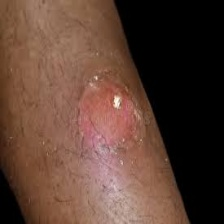

In [15]:
PIL.Image.open(str(cellulitis[6]))

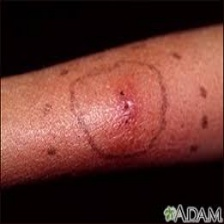

In [16]:
PIL.Image.open(str(cellulitis[16]))

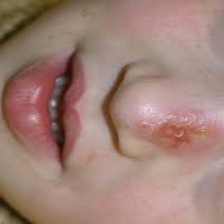

In [17]:
PIL.Image.open(str(BA_impetigo[16]))

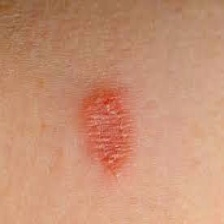

In [18]:
PIL.Image.open(str(FU_ringworm[4]))

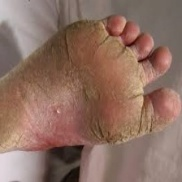

In [19]:
PIL.Image.open(str(FU_athlete_foot[16]))

In [20]:
cv2.imread(str( cellulitis[0])).shape[2]

3

In [21]:
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('normal/*')),   
}

In [22]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [23]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [24]:
x_train[0].shape

(224, 224, 3)

In [25]:
len(disease_images_train_dic['ringworm']),len(disease_images_train_dic['shingles'])

(90, 130)

In [26]:
len(x_train)

925

In [27]:
len(y_train)

925

In [28]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(925,)

In [29]:
dataset_url=r'C:\Users\ravik\OneDrive\Desktop\skin-disease-datasaet\test_set'

In [30]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

WindowsPath('C:/Users/ravik/OneDrive/Desktop/skin-disease-datasaet/test_set')

In [31]:
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('test_set/normal/*')),   
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [32]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [33]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [34]:
x_test.shape

(234, 224, 224, 3)

In [35]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [36]:
x_train_scaled[0]

array([[[0.25098039, 0.10588235, 0.02745098],
        [0.25490196, 0.10980392, 0.03137255],
        [0.25490196, 0.09803922, 0.02352941],
        ...,
        [0.0627451 , 0.08235294, 0.0745098 ],
        [0.04705882, 0.06666667, 0.05882353],
        [0.02352941, 0.04313725, 0.03529412]],

       [[0.2627451 , 0.11764706, 0.03921569],
        [0.25490196, 0.10980392, 0.03137255],
        [0.2627451 , 0.10588235, 0.03137255],
        ...,
        [0.04705882, 0.06666667, 0.05882353],
        [0.05098039, 0.07058824, 0.0627451 ],
        [0.03529412, 0.05490196, 0.04705882]],

       [[0.28235294, 0.1254902 , 0.05098039],
        [0.2745098 , 0.11764706, 0.04313725],
        [0.2627451 , 0.10588235, 0.03137255],
        ...,
        [0.07058824, 0.09019608, 0.08235294],
        [0.0627451 , 0.08235294, 0.0745098 ],
        [0.06666667, 0.08627451, 0.07843137]],

       ...,

       [[0.40784314, 0.42745098, 0.39215686],
        [0.37647059, 0.39607843, 0.36078431],
        [0.38039216, 0

In [37]:
import tensorflow_hub as hub

In [38]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)  

In [39]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
x_train_scaled.shape

(925, 224, 224, 3)

In [41]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)


TensorFlow Version: 2.18.0
TensorFlow Hub Version: 0.16.1


In [42]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)  

In [43]:
print(feature_extractor_layer)


In [44]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, trainable=False, input_shape=(224, 224, 3))


In [45]:
from tensorflow import keras
import tensorflow_hub as hub

# Define feature extractor with Lambda layer
model = keras.Sequential([
    keras.layers.Lambda(lambda x: feature_extractor_layer(x)),  # Wrap it in Lambda
    keras.layers.Dense(9, activation='softmax')
])


In [46]:
pip install --upgrade tensorflow tensorflow-hub


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, trainable=False)


In [48]:
feature_extractor_layer = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=(224, 224, 3),  # Explicitly define input shape
    trainable=False
)


In [52]:
from tensorflow.keras.applications import MobileNetV2


In [49]:
import numpy as np

print("x_train_scaled shape:", x_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_train unique values:", np.unique(y_train))  # Check class labels
print("x_train_scaled max/min:", np.max(x_train_scaled), np.min(x_train_scaled))


x_train_scaled shape: (925, 224, 224, 3)
y_train shape: (925,)
y_train unique values: [0 1 2 3 4 5 6 7]


x_train_scaled max/min: 1.0 0.0


In [54]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (so they don’t get trained)
base_model.trainable = False

# Add a global pooling layer and classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.2)(x)
outputs = Dense(9, activation="softmax")(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train_scaled, y_train, epochs=15, validation_data=(x_test_scaled, y_test))


Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 605ms/step - accuracy: 0.4366 - loss: 1.6315 - val_accuracy: 0.8846 - val_loss: 0.4395
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - accuracy: 0.8940 - loss: 0.3297 - val_accuracy: 0.9060 - val_loss: 0.3040
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 598ms/step - accuracy: 0.9556 - loss: 0.1650 - val_accuracy: 0.9145 - val_loss: 0.2334
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 533ms/step - accuracy: 0.9771 - loss: 0.1173 - val_accuracy: 0.9530 - val_loss: 0.1644
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 528ms/step - accuracy: 0.9832 - loss: 0.0823 - val_accuracy: 0.9444 - val_loss: 0.1501
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - accuracy: 0.9901 - loss: 0.0628 - val_accuracy: 0.9615 - val_loss: 0.0987
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 540ms/step - accuracy: 0.9973 - loss: 0.0372 - val_accuracy: 0.9701 - val_loss: 0.0932
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 552ms/step - accuracy: 0.9942 - loss: 0.0344 - val_accu

In [72]:
x_train_scaled = x_train_scaled.reshape((-1, 224, 224, 3))
x_test_scaled = x_test_scaled.reshape((-1, 224, 224, 3))

In [55]:
x_test_scaled.shape

(234, 224, 224, 3)

In [56]:
model.evaluate(x_test_scaled,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.9723 - loss: 0.0828


[0.09585423022508621, 0.9658119678497314]

In [57]:
y_predict=model.predict(x_test_scaled)
# y_predict[0]
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
    
y_predicted_labels=np.array(y_predicted_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.95      1.00      0.98        20
           2       0.94      0.97      0.95        32
           3       0.97      1.00      0.99        33
           4       0.92      0.96      0.94        23
           5       1.00      0.84      0.91        25
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.98        33

    accuracy                           0.97       234
   macro avg       0.97      0.96      0.96       234
weighted avg       0.97      0.97      0.97       234



In [59]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[33,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 22,  0,  0,  0],
       [ 1,  1,  2,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32]], dtype=int32)>

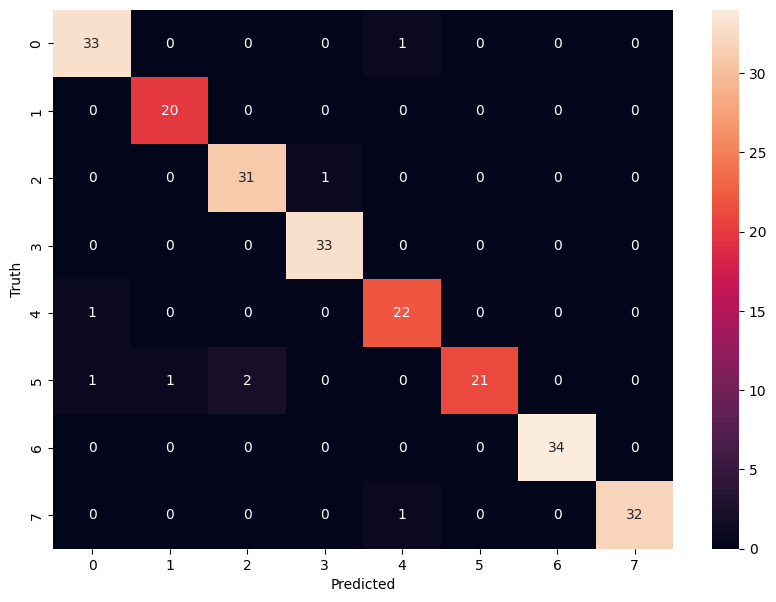

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [61]:
import joblib

# Save the trained model as a pickle file
joblib.dump(model, 'skin_disease_model.pkl')

print("Model saved as skin_disease_model.pkl")


Model saved as skin_disease_model.pkl


In [62]:
model.save("skin_lesion_model.h5")


In [63]:
print("Model expected input shape:", model.input_shape)



Model expected input shape: (None, 224, 224, 3)


In [64]:
print("Expected model input shape:", model.input_shape)


Expected model input shape: (None, 224, 224, 3)


In [65]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Error loading image. Check file path.")
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img.astype(np.float32)


In [66]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 224, 224, 3)


In [67]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)  # Add an intermediate layer if needed
x = Dense(9, activation="softmax")(x)  # 9 classes


In [68]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")
    img = cv2.resize(img, (224, 224))  # Resize to model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img.astype(np.float32)


In [69]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path, target_size):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to create a batch size
    img_expanded = np.expand_dims(img_array, axis=0)
    
    # Normalize the image
    img_normalized = img_expanded / 255.0  # or use img_expanded / 127.5 - 1.0 for [-1, 1] range
    
    return img_normalized

def preprocess_images_in_folder(folder_path, target_size):
    preprocessed_images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust based on your image formats
            img_path = os.path.join(folder_path, filename)
            preprocessed_image = preprocess_image(img_path, target_size)
            preprocessed_images.append(preprocessed_image)
    return preprocessed_images

# Define the folder path and target size
folder_path = r'C:\Users\ravik\OneDrive\Desktop\skin-disease-datasaet\test_set\BA- cellulitis'
target_size = (224,224)  # Replace with the dimensions your model expects

# Preprocess all images in the folder
preprocessed_images = preprocess_images_in_folder(folder_path, target_size)

# `preprocessed_images` now contains all the preprocessed images ready for prediction


In [70]:
from tensorflow.keras.layers import Dropout


In [71]:

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (so they don’t get trained)
base_model.trainable = False

# Add a global pooling layer and classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)  
x = Dropout(0.2)(x)  
outputs = Dense(9, activation="softmax")(x)  

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train_scaled, y_train, epochs=15, validation_data=(x_test_scaled, y_test))

x_train_scaled = x_train_scaled.reshape((-1, 224, 224, 3))
x_test_scaled = x_test_scaled.reshape((-1, 224, 224, 3))


Epoch 1/15
26/29 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.4312 - loss: 1.7325

KeyboardInterrupt: 